# Diabetes Prediction 

In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Data Analysis

In [23]:
df = pd.read_csv('/kaggle/input/diabetes-data-set/diabetes.csv')

In [24]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [26]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


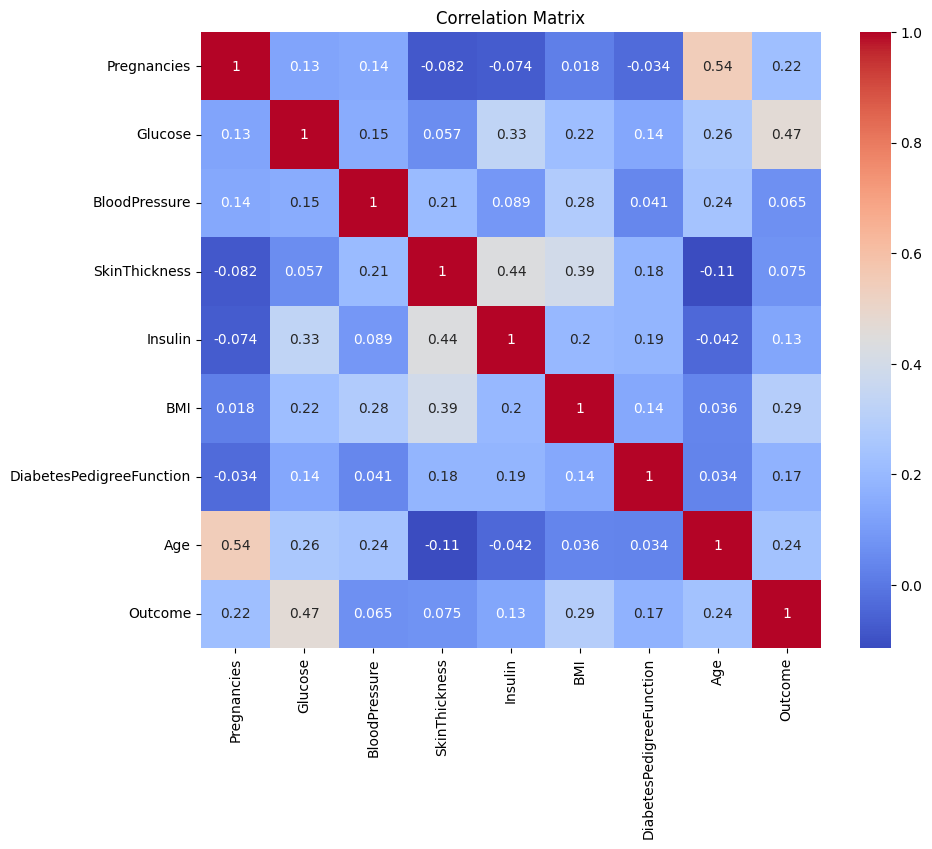

In [13]:
# Visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

## Scaling values for better prediction

In [40]:
data = df.values

x = data[:,:-1]
y = data[:,-1]

print(x.shape)
print(y.shape)

print(x[:4])

(768, 8)
(768,)
[[6.00e+00 1.48e+02 7.20e+01 3.50e+01 0.00e+00 3.36e+01 6.27e-01 5.00e+01]
 [1.00e+00 8.50e+01 6.60e+01 2.90e+01 0.00e+00 2.66e+01 3.51e-01 3.10e+01]
 [8.00e+00 1.83e+02 6.40e+01 0.00e+00 0.00e+00 2.33e+01 6.72e-01 3.20e+01]
 [1.00e+00 8.90e+01 6.60e+01 2.30e+01 9.40e+01 2.81e+01 1.67e-01 2.10e+01]]


In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0,test_size = 0.2)

In [44]:
x_train.shape

(614, 8)

In [45]:
# Scaling the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [46]:
print(type(x_train))

<class 'numpy.ndarray'>


In [47]:
x_train[:4]

array([[ 0.90832902,  0.91569367,  0.44912368,  0.52222619,  0.3736349 ,
         0.37852648,  0.67740401,  1.69955804],
       [ 0.03644676, -0.75182191, -0.47230103,  0.14814855, -0.69965674,
        -0.50667229, -0.07049698, -0.96569189],
       [-1.12606292,  1.38763205,  1.06340683,  0.77161128,  5.09271083,
         2.54094063, -0.11855487, -0.88240283],
       [-0.8354355 , -0.37427121, -0.67706208,  0.02345601,  0.45029859,
        -0.88604319,  1.10091422, -0.88240283]])

## Trying Different Classification Models

* ### Random Forest Classifier

In [48]:
clf = RandomForestClassifier(random_state = 0)

clf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [49]:
yPred = clf.predict(x_test)

accuracy :  0.7857142857142857
precision :  0.6590909090909091
f1-score :  0.6373626373626374


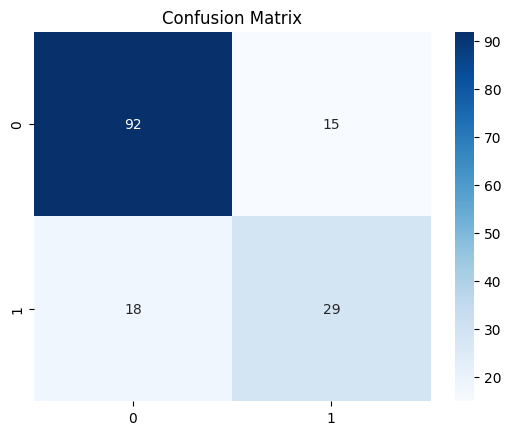

In [53]:
accuracy = accuracy_score(y_test,yPred)
precision = precision_score(y_test,yPred)
f1 = f1_score(y_test,yPred)
print("accuracy : ",accuracy)
print("precision : ",precision)
print("f1-score : ",f1)

cm= confusion_matrix(y_test, yPred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

* ### Decision Tree Clasifier

In [54]:
clf = DecisionTreeClassifier()

clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [55]:
yPred = clf.predict(x_test)

accuracy :  0.7402597402597403
precision :  0.5660377358490566
f1-score :  0.6


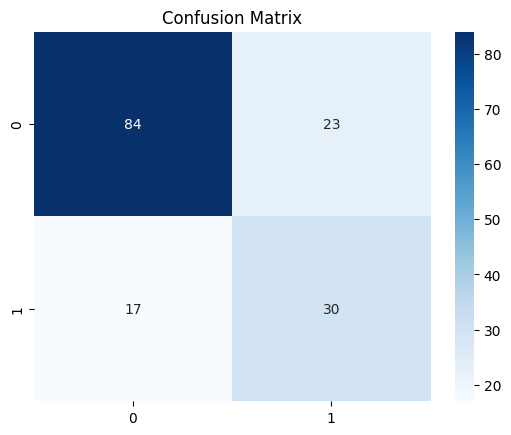

In [56]:
accuracy = accuracy_score(y_test,yPred)
precision = precision_score(y_test,yPred)
f1 = f1_score(y_test,yPred)
print("accuracy : ",accuracy)
print("precision : ",precision)
print("f1-score : ",f1)

cm= confusion_matrix(y_test, yPred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

* ### Logistic Regression

In [57]:
clf = LogisticRegression()

clf.fit(x_train,y_train)

LogisticRegression()

In [58]:
yPred = clf.predict(x_test)

accuracy :  0.8246753246753247
precision :  0.7631578947368421
f1-score :  0.6823529411764706


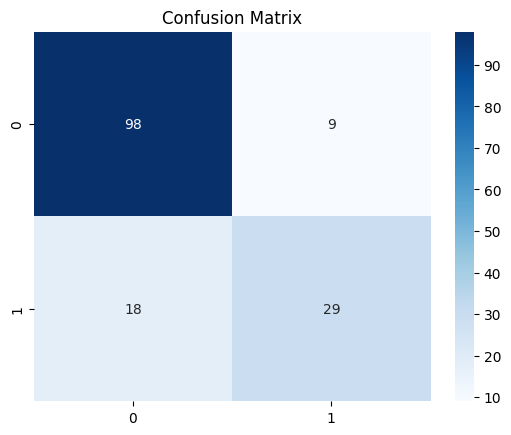

In [59]:
accuracy = accuracy_score(y_test,yPred)
precision = precision_score(y_test,yPred)
f1 = f1_score(y_test,yPred)
print("accuracy : ",accuracy)
print("precision : ",precision)
print("f1-score : ",f1)

cm= confusion_matrix(y_test, yPred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

* ### Naive Bayes

* #### using default hyper parameters

In [60]:
clf = GaussianNB()

clf.fit(x_train,y_train)

GaussianNB()

In [61]:
yPred = clf.predict(x_test)

accuracy :  0.7922077922077922
precision :  0.6744186046511628
f1-score :  0.6444444444444444


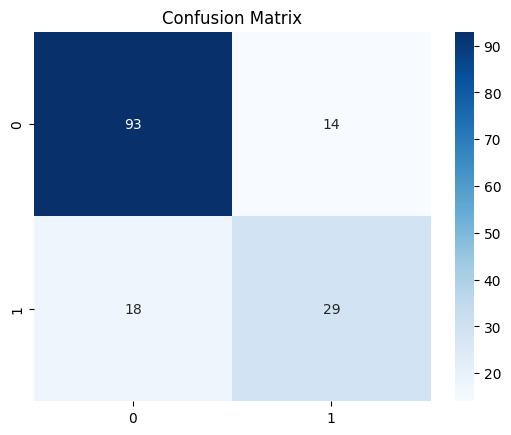

In [62]:
accuracy = accuracy_score(y_test,yPred)
precision = precision_score(y_test,yPred)
f1 = f1_score(y_test,yPred)
print("accuracy : ",accuracy)
print("precision : ",precision)
print("f1-score : ",f1)

cm= confusion_matrix(y_test, yPred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

* #### using grid search to find good hyper parameters

In [80]:
clf_gnb = GaussianNB()

gnb_params = {'var_smoothing':[1e-9,1e-10,1e-12,1e-8,1e-5,1e-20,1e-2]}

clf = GridSearchCV(clf_gnb,gnb_params,cv = 10,scoring = 'accuracy')

clf.fit(x_train,y_train)

print(clf.best_params_)

print(clf.best_score_)

{'var_smoothing': 1e-09}
0.7426758328926493


In [81]:
clf = GaussianNB(var_smoothing = 1e-9)

clf.fit(x_train,y_train)

yPred = clf.predict(x_test)

accuracy :  0.7922077922077922
precision :  0.6744186046511628
f1-score :  0.6444444444444444


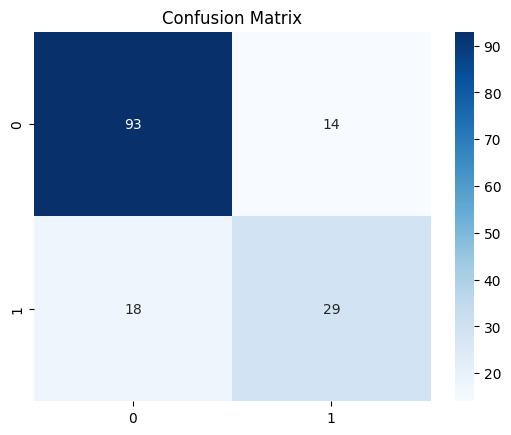

In [82]:
accuracy = accuracy_score(y_test,yPred)
precision = precision_score(y_test,yPred)
f1 = f1_score(y_test,yPred)
print("accuracy : ",accuracy)
print("precision : ",precision)
print("f1-score : ",f1)

cm= confusion_matrix(y_test, yPred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

* ### SVM

* #### train using default hyperparameters

accuracy :  0.7922077922077922
precision :  0.7027027027027027
f1-score :  0.6190476190476191


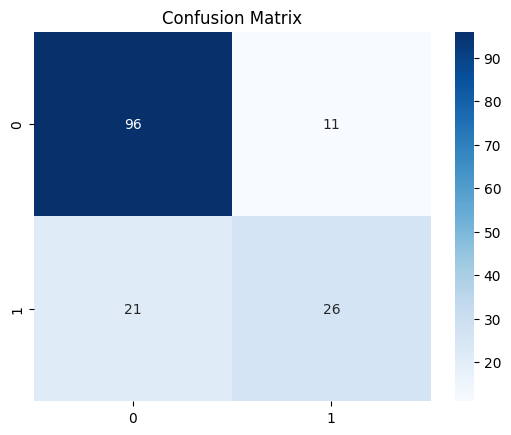

In [77]:
clf = SVC()

clf.fit(x_train,y_train)

yPred = clf.predict(x_test)

accuracy = accuracy_score(y_test,yPred)
precision = precision_score(y_test,yPred)
f1 = f1_score(y_test,yPred)
print("accuracy : ",accuracy)
print("precision : ",precision)
print("f1-score : ",f1)

cm= confusion_matrix(y_test, yPred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


* #### using gridSearchCrossValidation to find good hyper parameters

In [70]:
svm = SVC()

svm_params = {'C':[1,10,100,1000] , 
              'kernel':['linear', 'poly', 'rbf', 'sigmoid'] ,
              'gamma':['scale','auto',1e-10,1e-5,1e-7]}

clf = GridSearchCV(svm,svm_params,cv=5,scoring='accuracy')

clf.fit(x_train,y_train)

print(clf.best_params_)

print(clf.best_score_)

{'C': 1000, 'gamma': 1e-05, 'kernel': 'sigmoid'}
0.7622284419565506


In [75]:
clf = SVC(C=1000,gamma=1e-05,kernel='sigmoid')

clf.fit(x_train,y_train)

yPred = clf.predict(x_test)

accuracy :  0.8246753246753247
precision :  0.7777777777777778
f1-score :  0.674698795180723


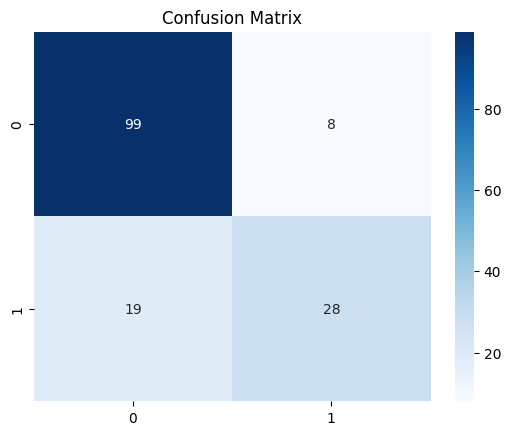

In [76]:
accuracy = accuracy_score(y_test,yPred)
precision = precision_score(y_test,yPred)
f1 = f1_score(y_test,yPred)
print("accuracy : ",accuracy)
print("precision : ",precision)
print("f1-score : ",f1)

cm= confusion_matrix(y_test, yPred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

* ### Using Deep Neural Network

In [91]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Input,Dense,Dropout
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [212]:
model = Sequential()

model.add(Input(shape = [8]))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation = 'sigmoid'))

model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_56 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,433 (134.50 KB)

 Trainable params: 34,433 (134.50 KB)

 Non-trainable params: 0 (0.00 B)

In [213]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [214]:
model_checkpoint = ModelCheckpoint('model.keras',
                                   monitor='val_accuracy',
                                   verbose = 1,
                                   save_best_only = True)

In [215]:
early_stopping = EarlyStopping(monitor='val_accuracy',
                               min_delta = 0.0,
                               mode = 'max',
                               patience = 10,
                               verbose = 1)

In [216]:
call_backs = [model_checkpoint,early_stopping]

In [217]:
model.fit(x_train,
          y_train,
          epochs = 100,
          batch_size = 16,
          verbose = 1,
          validation_split = 0.2,
          callbacks = call_backs)

Epoch 1/100
18/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5842 - loss: 0.6774
Epoch 1: val_accuracy improved from -inf to 0.75610, saving model to model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6153 - loss: 0.6523 - val_accuracy: 0.7561 - val_loss: 0.5053
Epoch 2/100
21/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7627 - loss: 0.5450 
Epoch 2: val_accuracy improved from 0.75610 to 0.78862, saving model to model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7648 - loss: 0.5358 - val_accuracy: 0.7886 - val_loss: 0.4797
Epoch 3/100
17/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8070 - loss: 0.4414 
Epoch 3: val_accuracy did not improve from 0.78862
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7954 - loss: 0.4505 - val_accuracy: 0.7805 - val_loss: 0.4798
Epoch 4/100
19/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7710 - loss: 0.4651 
Epoch 4: val_accuracy did not improve from 0.78862
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc

In [218]:
model.evaluate(x_test,y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8361 - loss: 0.4948 


[0.4882078170776367, 0.8116883039474487]

In [219]:
model.save('final_model.keras')

In [224]:
yPred = model.predict(x_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [227]:
def change(a):
    if a<0.5:
        return 0
    else:
        return 1
yPred = [change(a) for a in yPred]

accuracy :  0.8116883116883117
precision :  0.7045454545454546
f1-score :  0.6813186813186813


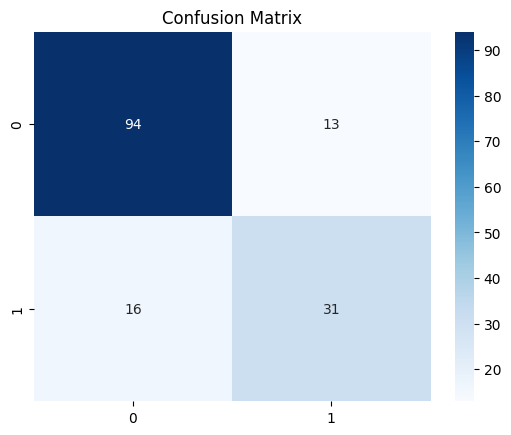

In [228]:
accuracy = accuracy_score(y_test,yPred)
precision = precision_score(y_test,yPred)
f1 = f1_score(y_test,yPred)
print("accuracy : ",accuracy)
print("precision : ",precision)
print("f1-score : ",f1)

cm= confusion_matrix(y_test, yPred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()